# introduction to neural network calssification with tensorflow
in this notebook we are going to learn how to write neural networks for classification problems
a few types of classification problems:
Binary classification
multiclass classification
multilabel classification

In [40]:
# creating data to view and fit
from sklearn.datasets import make_circles

# make 1000 examples
n_samples =1000

#create circles
X, y =  make_circles(n_samples, noise = 0.03,
                     random_state = 42)

In [41]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [42]:
#check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

our data tis a little hard to underatsnd roght now.   lets' visualize

In [43]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


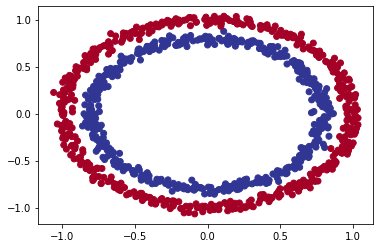

In [44]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

##input and output shapes

In [45]:
#check the shapes of our features and labels
X.shape, y.shape


((1000, 2), (1000,))

In [46]:
#how amny samples we are working
len(X), len(y)

(1000, 1000)

In [47]:
#view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#steps in modeling
the steps in modeling with tensorflow are typically:
1. create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate

In [74]:
import tensorflow as tf

#set random seed
tf.random.set_seed(42)

#1. create a model using the sequentila API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),

])
#2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy']
                )

# 3. fit the model
model_1.fit(X, y, epochs = 5)

TypeError: 'str' object is not callable

In [76]:
tf.__version__

'2.9.1'

In [49]:
#let's try and imporve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [50]:
# let's steps up and add extra layer
#set random seed
tf.random.set_seed(42)

# 1.create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

#3. fit the model
model_2.fit(X,y, epochs = 100, verbose = 0)



In [51]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

#improving our model



In [52]:
#set random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, y, epochs =100, verbose = 0)

In [53]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

In [54]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.4879329 ],
       [0.5588747 ],
       [0.56292707],
       [0.57050633],
       [0.4414107 ],
       [0.5738816 ],
       [0.5576486 ],
       [0.4824668 ],
       [0.4775569 ],
       [0.57502276],
       [0.5148473 ],
       [0.53087765],
       [0.5643773 ],
       [0.4578729 ],
       [0.45052683],
       [0.46129808],
       [0.5405564 ],
       [0.46380818],
       [0.5479788 ],
       [0.50375485],
       [0.5063048 ],
       [0.58775413],
       [0.4590232 ],
       [0.4912336 ],
       [0.5832149 ],
       [0.57042426],
       [0.55239403],
       [0.46317372],
       [0.4577331 ],
       [0.45440948],
       [0.47872066],
       [0.57856053],
       [0.5554617 ],
       [0.4633919 ],
       [0.4584901 ],
       [0.589866  ],
       [0.572473  ],
       [0.5297445 ],
       [0.45870456],
       [0.5109296 ],
       [0.4999397 ],
       [0.5463092 ],
       [0.5109885 ],
       [0.4579726 ],
       [0.5223254 ],
       [0.53887844],
       [0.44872212],
       [0.544

In [55]:
import numpy as np

In [56]:
#to visualize our model's predictions, let's create a function 'plot_decision_boundary()'


def plot_decision_boundary(model, X, y):
  """
  plots the decision boundary created bu a model predicting on X
  """

  # define the axis boundarues of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1


  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))


  #create x value (we are going to make predictions on these)

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0])> 1:

    print('doing multiclass classification')

    #we have to reshape our predictions to get them  ready for plotting
    y_pred = np.argmax(y_pred, axis =1). reshape(xx.shape)


  else:
      print('doing binary classification')
      y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha =0.7 )
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())







313/313 [==============================] - 1s 2ms/step
doing binary classification


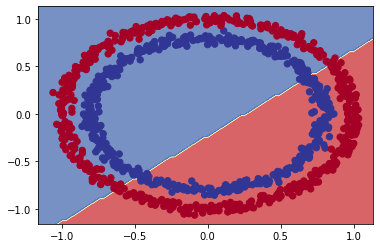

In [57]:
#check out the predictions that our model is making
plot_decision_boundary(model = model_3,
                       X= X,
                       y = y)

In [58]:
#lets see if our modek can be used for a regression problem

tf.random.set_seed(42)

#create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y=X+100

X_regression, y_regression



(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [59]:
#split our data inot training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# #fit our model to regeression data
# model_3.fit(X_reg_train, y_reg_train , epochs =100 )

In [60]:
#setup random seed
tf.random.set_seed(42)

# 1. create the models

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#2. compile the model, this time with a regression-specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

#.fit the model
model_3.fit(X_reg_train, y_reg_train, epochs =100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 2ms/step - loss: 38.8398 - mae: 38.8398
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

In [61]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1337117525463374)

2/2 [==============================] - 0s 6ms/step


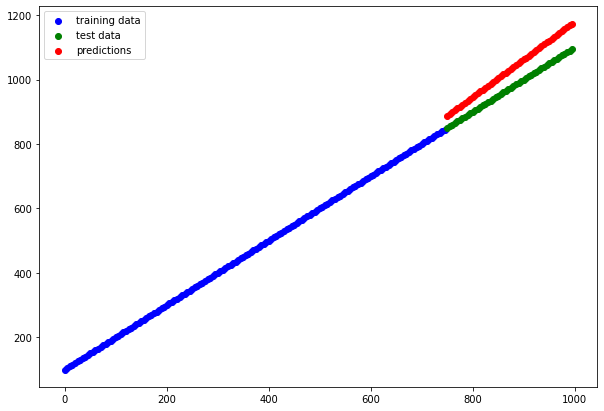

In [62]:
y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predictions against our regression data
plt.figure(figsize = (10,7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label = "test data")
plt.scatter(X_reg_test, y_reg_preds,  c = 'r', label = 'predictions')
plt.legend();

In [63]:
#non-linearity
# set the random seed
tf.random.set_seed(42)

#1. create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

# 2.compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ['accuracy'])

#3. fit the model
history = model_4.fit(X,y, epochs =100)

Epoch 1/100


C:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 3.6463 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5734 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7819 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4920
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4750
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4990
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4890
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4680
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4670
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4570
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4800
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5060
Epoch 93/100


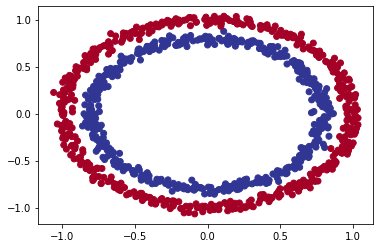

In [64]:
#check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 2s 5ms/step
doing binary classification


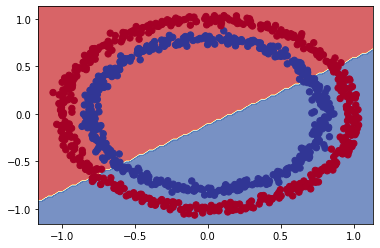

In [65]:
#check the dicision boundary for our latest model
plot_decision_boundary(model = model_4,
                       X=X,
                       y=y)

In [66]:
#set random seed
tf.random.set_seed(42)

#1. create a model with non-linear activation

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

#2. compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.031),
                metrics=['accuracy'])

#3.fit the model
history = model_5.fit(X,y, epochs=150)

Epoch 1/150
32/32 [==============================] - 3s 11ms/step - loss: 1.0851 - accuracy: 0.4680
Epoch 2/150
32/32 [==============================] - 0s 11ms/step - loss: 0.7259 - accuracy: 0.4390
Epoch 3/150
32/32 [==============================] - 0s 8ms/step - loss: 0.6959 - accuracy: 0.4660
Epoch 4/150
32/32 [==============================] - 0s 8ms/step - loss: 0.6824 - accuracy: 0.5580
Epoch 5/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.6060
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.6390
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6930
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.6770
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7510
Epoch 10/150
32/32 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.7790
Epoch 1

Epoch 83/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.5990
Epoch 84/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6050
Epoch 85/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6060
Epoch 86/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6030
Epoch 87/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6050
Epoch 88/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.6000
Epoch 89/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6130
Epoch 90/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6120
Epoch 91/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.6150
Epoch 92/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.6230


313/313 [==============================] - 0s 1ms/step
doing binary classification


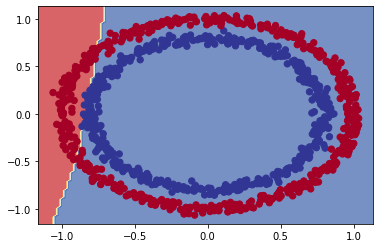

In [67]:
#check the dicision boundary for our latest model
plot_decision_boundary(model = model_5,
                       X=X,
                       y=y)

In [68]:
#time to replicate the multi -layer neural network from playgrounf
#set random seed
tf.random.set_seed(42)


#create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

#3. fit the model
history = model_6.fit(X, y, epochs=250, verbose=1)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/250


32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 172/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 173/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


In [69]:
#evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [70]:
#set random seed
tf.random.set_seed(42)


#create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.03),
                metrics = ['accuracy'])

#3. fit the model
history = model_7.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.5440
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5880
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7170
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7830
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.9160
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9330
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9700
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9770
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9740
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9840
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9630
Epoch 84/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9750
Epoch 85/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9910
Epoch 86/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9810
Epoch 87/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9870
Epoch 88/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9920
Epoch 89/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9890
Epoch 90/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9870
Epoch 91/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9790
Epoch 92/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9630
Epoch 93/500


32/32 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9810
Epoch 165/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9930
Epoch 166/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9940
Epoch 167/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9930
Epoch 168/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9770
Epoch 169/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9840
Epoch 170/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9860
Epoch 171/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9920
Epoch 172/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9930
Epoch 173/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9950
Epoc

32/32 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9930
Epoch 246/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9950
Epoch 247/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9940
Epoch 248/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9970
Epoch 249/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9970
Epoch 250/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9950
Epoch 251/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9760
Epoch 252/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9890
Epoch 253/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9930
Epoch 254/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9890
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9960
Epoch 327/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9940
Epoch 328/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.9940
Epoch 329/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9930
Epoch 330/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 331/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9930
Epoch 332/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9790
Epoch 333/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9790
Epoch 334/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9810
Epoch 335/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9950
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9960
Epoch 408/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9950
Epoch 409/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9970
Epoch 410/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.9990
Epoch 411/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9940
Epoch 412/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9920
Epoch 413/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9770
Epoch 414/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9960
Epoch 415/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 416/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9870
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9990
Epoch 489/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 490/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 491/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 492/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 493/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 494/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 495/500
32/32 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 0.9960
Epoch 496/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9970
Epoch 497/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9990
Epoc

In [71]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9980


[0.003849960630759597, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classification


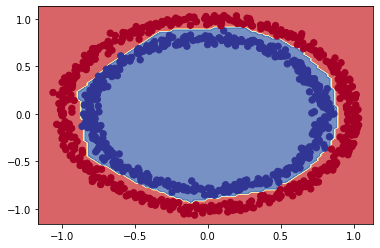

In [72]:
#check the dicision boundary for our latest model
plot_decision_boundary(model = model_7,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

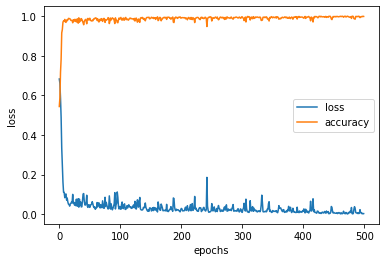

In [73]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')